# Factorial Designs

A factorial design has some number of factors occuring at some number of levels. A full factorial design, all possible combinations of the levels of the factors occur at least once

## Two-Way ANOVA

* Two factos, $\alpha$ at level $I$ and $\beta$ $J$ level. Let $n_{ij}$ be the number of observations at level $i$ of $\alpha$ and $j$ of $\beta$. 

<p>&nbsp;</p>
\begin{split}
y_{ijk} = \mu + \alpha_i + \beta_j + (\gamma)_{ij} + \epsilon_{ijk} 
\end{split}
<p>&nbsp;</p>

The interaction term $\gamma$ is the part of the mean response not attributed to the additive effect of of $\alpha_i$ and $\beta_j$

* A significant interaction makes the model hard to interpret, as $\hat \alpha$ cannot be studied independent of $\hat \beta$. A comparison of the levels of $\alpha$ will depend on the level of $\beta$

* The response is a measure of performance
*  When we have significant interaction, an interaction plot of the fitted values can mae it easier to describe the nature and impact of the effect

## Two-Way ANOVA with One Observation per Cell

Study to report an experiment to test the strength of a thermophastic composite depending on the power of a laser and the speed of a tape

In [1]:
library(faraway)

In [3]:
data(composite)
head(composite)

,strength,laser,tape
,<dbl>,<fct>,<fct>
1,25.66,40W,slow
2,29.15,50W,slow
3,35.73,60W,slow
4,28.00,40W,medium
5,35.09,50W,medium
6,39.56,60W,medium


In [4]:
# We can fit the model 
g = lm(strength ~ laser + tape, composite)

* If we try to add the interaction term we would not have df. The parameter could be estimate by no further inference would be possible
* We can check interaction using an *interaction plot*

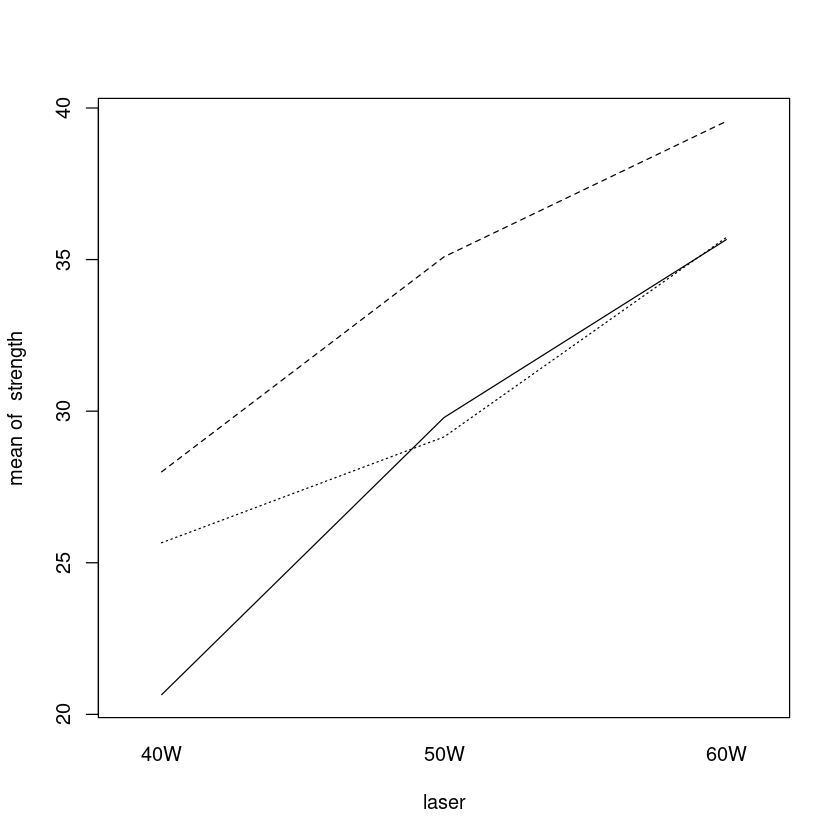

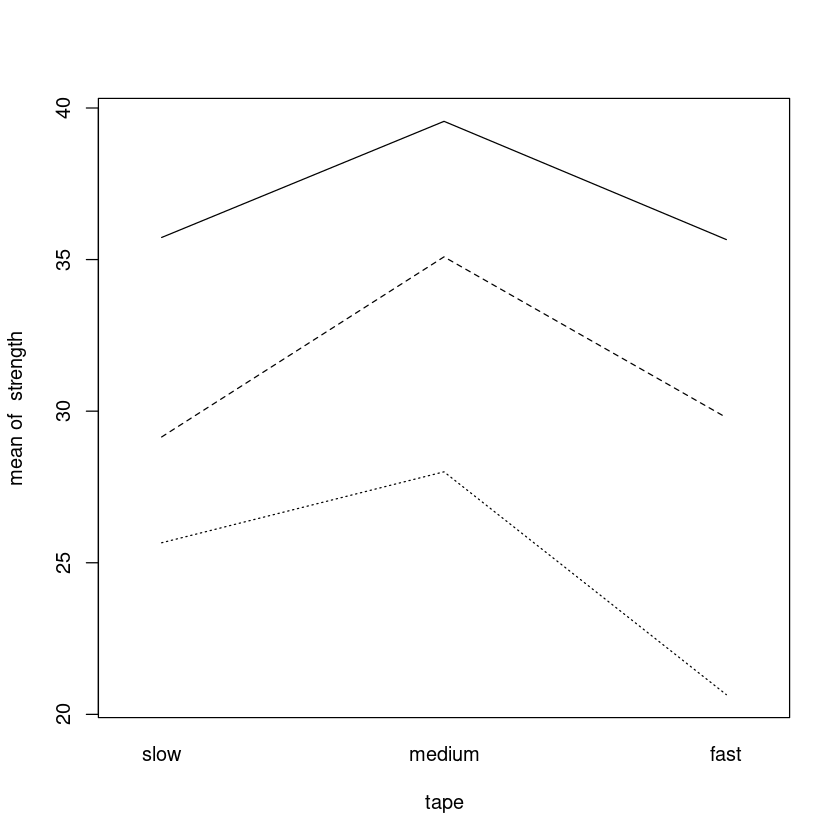

In [7]:
with(composite, interaction.plot(laser, tape, strength, legend=F))
with(composite, interaction.plot(tape, laser, strength, legend=F))

*  Because of the random variation, we can never expect the lines to be exactly parallel

<p>&nbsp;</p>
\begin{split}
y_{ij} = \mu + \alpha_i + \beta_j + \alpha_i \beta_j + \epsilon_{ijk}
\end{split}
<p>&nbsp;</p>

This is a nonlinear model because it involves the product of parameters $\alpha_i \beta_j $


In [9]:
round(coef(g), 3)

(Intercept)    laser50W    laser60W  tapemedium    tapefast 
     23.918       6.573      12.213       4.037      -1.480

In [19]:
lasercoefs = rep(c(0, 6.5733, 12.2133), 3)
tapecoefs = rep(c(0, 4.0367, -1.48), 3)


h = update(g, . ~ . + I(lasercoefs*tapecoefs))
anova(h)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
laser,2,224.18382,112.091911,42.689303,0.00200287
tape,2,48.91869,24.459344,9.315145,0.03124207
Residuals,4,10.50304,2.625761,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
laser,2,224.18382,112.091911,42.689303,0.00200287
tape,2,48.91869,24.459344,9.315145,0.03124207
Residuals,4,10.50304,2.625761,NA,NA


* Both factors are significant
* The strength increases with the laser powe but the strength is largest for medium tape speed bet less for slow or fast  tape speeds

In [22]:
composite$laser = as.ordered(composite$laser)
composite$tape = as.ordered(composite$tape)

g = lm(strength ~ laser + tape, composite)
summary(g)


Call:
lm(formula = strength ~ laser + tape, data = composite)

Residuals:
       1        2        3        4        5        6        7        8 
 1.74222 -1.34111 -0.40111  0.04556  0.56222 -0.60778 -1.78778  0.77889 
       9 
 1.00889 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.0322     0.5401  57.452  5.5e-07 ***
laser.L       8.6361     0.9355   9.231 0.000765 ***
laser.Q      -0.3810     0.9355  -0.407 0.704655    
tape.L       -1.0465     0.9355  -1.119 0.325944    
tape.Q       -3.9001     0.9355  -4.169 0.014045 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.62 on 4 degrees of freedom
Multiple R-squared:  0.963,	Adjusted R-squared:  0.9259 
F-statistic:    26 on 4 and 4 DF,  p-value: 0.004013


In [24]:
# we have linear and quadratic term for each factor
contr.poly(3)

.L,.Q
-7.071068e-01,0.4082483
-7.850462e-17,-0.8164966
7.071068e-01,0.4082483


* Linear term is proportional to (-1, 0, 1)
* Quadratic term is proportional to (1, -2, 1)
* We see that the quadratic term for laser power is not significant while there is quadratic effect for tape speed
*  One of the drawbacks of a model with factors is the difficulty of extrapolating to new conditions

In [27]:
composite$Ntape = rep (c (6.42,13,27), each=3)
composite$Nlaser = rep (c(40, 50, 60), 3)


gl  = lm(strength ~ Nlaser + poly(log(Ntape), 2), composite)
summary(gl)


Call:
lm(formula = strength ~ Nlaser + poly(log(Ntape), 2), data = composite)

Residuals:
      1       2       3       4       5       6       7       8       9 
 1.5867 -1.0300 -0.5567 -0.1100  0.8733 -0.7633 -1.9433  1.0900  0.8533 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.49889    3.05918   0.163 0.876842    
Nlaser                0.61067    0.06038  10.113 0.000162 ***
poly(log(Ntape), 2)1 -1.88137    1.47909  -1.272 0.259329    
poly(log(Ntape), 2)2 -6.73640    1.47909  -4.554 0.006088 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.479 on 5 degrees of freedom
Multiple R-squared:  0.9614,	Adjusted R-squared:  0.9383 
F-statistic: 41.55 on 3 and 5 DF,  p-value: 0.0005869


* We use log of tape speed, as this results in roughly evenly spaced levels
* This model fits about as well as the two-factor model but has the advantage that we make predictions for values of tape speed and laser power that were not used in experiment

## Two-Way ANOVA with More that One Observation per Cell

Consider the case when the number of observations per cell is the same and greater than one, so that $n_{ij}=n>1$ for all $i,j$

<p>&nbsp;</p>
\begin{split}
y_{ijk} = \mu + \alpha_i + \beta_j + (\gamma)_{ij} + \epsilon_{ijk} 
\end{split}
<p>&nbsp;</p>

The model with interaction can be tested against the null model 

<p>&nbsp;</p>
\begin{split}
y_{ijk} = \mu + \alpha_i + \beta_j + \epsilon_{ijk} 
\end{split}
<p>&nbsp;</p>

 If the interaction effect is foun to be insignificant , then test the main effects, but use $RRS/df$ from the full model in the denominator of the F-test
 
 <p>&nbsp;</p>
\begin{split}
F = \frac{\frac{RSS_{small}- RSS_{large}}{df_{small}-df_{large}}}{\hat \sigma_{full}^2}
\end{split}
<p>&nbsp;</p>

### Study

The goal is to study factors affecting the production of the plastic polyvinyl chloride (PVC)
* For each of the 24 combinations, 2 samples were produced

In [ ]:
data(pvc)
